In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, models, layers

import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
objects = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']

In [4]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [6]:
def plot_images(x, y, index):
    plt.imshow(x[index])
    plt.xlabel(objects[y[index]]) 

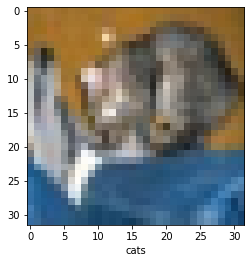

In [7]:
plot_images(X_test, y_test, 0)

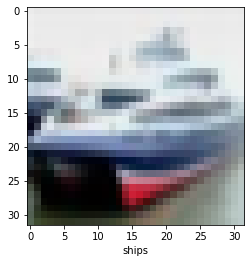

In [8]:
plot_images(X_test, y_test, 1)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
import keras
from tensorflow.keras import Sequential
from tensorflow.keras import models,layers

# ANN Model

In [11]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.8115 - accuracy: 0.3549
Epoch 2/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.6221 - accuracy: 0.4253
Epoch 3/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.5392 - accuracy: 0.4579
Epoch 4/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4804 - accuracy: 0.4790
Epoch 5/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.4305 - accuracy: 0.4975


In [12]:
ann_yPred = ann.predict(X_test)
pred=np.argmax(ann_yPred,axis=1)
pred

array([3, 8, 8, ..., 5, 6, 7], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.4888

'dogs'

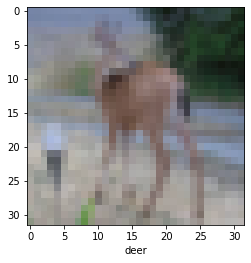

In [14]:
ind = 100
plot_images(X_test, y_test, ind)
objects[np.argmax(ann_yPred[ind])]

In [15]:
from sklearn.metrics import classification_report

ann_pred_objects = [np.argmax(i) for i in ann_yPred]
print(classification_report(y_test, ann_pred_objects))

              precision    recall  f1-score   support

           0       0.51      0.57      0.54      1000
           1       0.58      0.64      0.61      1000
           2       0.44      0.25      0.32      1000
           3       0.36      0.34      0.35      1000
           4       0.46      0.37      0.41      1000
           5       0.45      0.30      0.36      1000
           6       0.44      0.70      0.54      1000
           7       0.54      0.55      0.54      1000
           8       0.49      0.73      0.59      1000
           9       0.62      0.44      0.52      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



# CNN Model

In [16]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(100,activation="relu"),
    layers.Dense(10,activation="softmax")   
])

In [17]:
cnn.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4245 - accuracy: 0.4873
Epoch 2/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0806 - accuracy: 0.6204
Epoch 3/5
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9498 - accuracy: 0.6676
Epoch 4/5
1563/1563 [==============================] - 26s 16ms/step - loss: 0.8625 - accuracy: 0.6999
Epoch 5/5
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7923 - accuracy: 0.7237


In [18]:
result=cnn.predict(X_test)
res=np.argmax(result,axis=1)
res

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [19]:
accuracy_score(res,y_test)

0.6816

'deer'

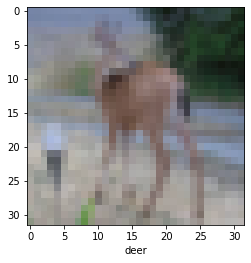

In [20]:
ind = 100
plot_images(X_test, y_test, ind)
objects[np.argmax(result[ind])]

In [21]:
result_objects = [np.argmax(i) for i in result]
print(classification_report(y_test, result_objects))

              precision    recall  f1-score   support

           0       0.73      0.65      0.68      1000
           1       0.84      0.78      0.81      1000
           2       0.51      0.64      0.57      1000
           3       0.57      0.40      0.47      1000
           4       0.59      0.66      0.62      1000
           5       0.55      0.67      0.60      1000
           6       0.81      0.69      0.75      1000
           7       0.74      0.75      0.74      1000
           8       0.77      0.80      0.78      1000
           9       0.80      0.77      0.79      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

